# Базовый функционал OpenCV. Работа с графами в networkx.

## Что мы изучим на этом занятии

* OpenCV
    * Что такое OpenCV
    * Установка и импортирование
    * Чтение и отображение изображений
    * Сохранение изображений
    * Преобразования изображений
    * Цветовые пространства
    * Фильтрация изображений
    * Обработка видео
    * Продвинутые возможности

* Networkx
    * Что такое networkx?
    * Установка и импортирование
    * Что такое граф?
    * Создание графов
    * Визуализация графов
    * Получение информации о графе (количество узлов, рёбер, степень узлов)
    * Алгоритмы поиска
    * Кратчайший путь

## OpenCV

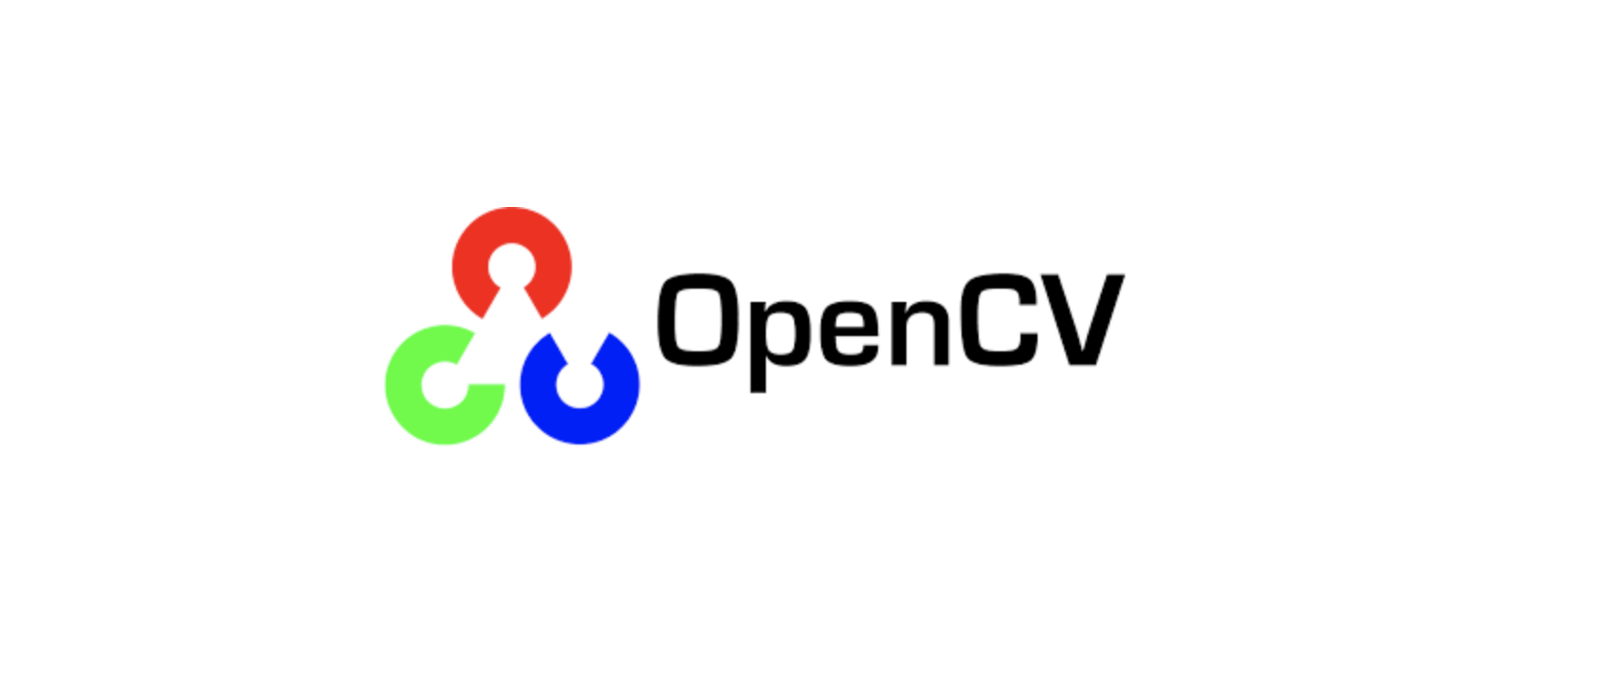

Источник: https://medium.com/javarevisited/important-libraries-of-opencv-56b14705bf0e

### Что такое OpenCV

OpenCV (Open Source Computer Vision Library) — это библиотека с открытым исходным кодом для компьютерного зрения и машинного обучения. Она разработана для обеспечения общей инфраструктуры приложений в области компьютерного зрения и ускорения использования машинного восприятия в коммерческих продуктах. OpenCV включает более 2500 оптимизированных алгоритмов, которые могут быть использованы для различных задач, таких как:

1. **Распознавание объектов**: Определение и классификация различных объектов на изображениях и видео.
2. **Обнаружение лиц**: Поиск и идентификация лиц в изображениях и видео.
3. **Обработка изображений**: Фильтрация, изменение размера, поворот и трансформация изображений.
4. **Видеоанализ**: Обнаружение движущихся объектов, отслеживание и анализ видеопотока.
5. **3D реконструкция**: Создание 3D моделей объектов из набора изображений.
6. **Машинное обучение**: Включает предобученные модели и инструменты для обучения новых моделей.

OpenCV написан на C++ и имеет интерфейсы для Python, Java, и MATLAB/Octave, что делает его доступным для использования на различных платформах и в различных средах разработки.

### Установка и импортирование

Используйте пакетный менеджер pip, чтобы установить OpenCV.

In [ ]:
!pip install opencv-python

После установки OpenCV, вы можете импортировать его в ваш Python скрипт. Обычно библиотека импортируется под псевдонимом cv2:

In [ ]:
import cv2

### Чтение и отображение изображений

Давайте скачаем какую-нибудь картинку, чтобы показать как можно работать в OpenCV с картинками

In [ ]:
!wget -O image.jpg https://i2-prod.mirror.co.uk/incoming/article25609261.ece/ALTERNATES/s615b/0_PUSS-IN-BOOTS.jpg

--2024-07-13 13:32:01--  https://i2-prod.mirror.co.uk/incoming/article25609261.ece/ALTERNATES/s615b/0_PUSS-IN-BOOTS.jpg
Resolving i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)... 52.84.125.64, 52.84.125.7, 52.84.125.8, ...
Connecting to i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)|52.84.125.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47066 (46K) [image/webp]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  45.96K  --.-KB/s    in 0.08s   

2024-07-13 13:32:01 (591 KB/s) - ‘image.jpg’ saved [47066/47066]



Загрузить картинку можно с помощью функции `imread`

In [ ]:
img = cv2.imread('image.jpg')

Загруженная картинка будет представлять собой NumPy массив. Давайте посмотрим на него.

In [ ]:
print(img)

[[[38 87 75]
  [38 87 75]
  [38 87 75]
  ...
  [25 72 55]
  [25 72 55]
  [25 72 55]]

 [[35 85 73]
  [35 85 73]
  [35 85 73]
  ...
  [25 72 55]
  [25 72 55]
  [25 72 55]]

 [[32 82 69]
  [32 82 69]
  [32 82 69]
  ...
  [25 72 55]
  [25 72 55]
  [25 72 55]]

 ...

 [[19 17 17]
  [19 17 17]
  [19 17 17]
  ...
  [34 56 52]
  [32 54 50]
  [31 52 49]]

 [[19 17 17]
  [19 17 17]
  [19 17 17]
  ...
  [32 56 52]
  [31 55 51]
  [30 54 50]]

 [[19 17 17]
  [19 17 17]
  [19 17 17]
  ...
  [32 56 52]
  [31 55 51]
  [30 54 50]]]


Теперь давайте посмотрим на размерность массива. Из неё мы можем увидеть, что картинка имеет разрешение 614 x 615 пикселей.

In [ ]:
img.shape

(614, 615, 3)


Заметьте, что каждый пиксель имеет 3 числа. Посмотрим на эти три значения в одном из пикселей:

In [ ]:
img[0][0]

array([38, 87, 75], dtype=uint8)

Эти три значения представляют собой насыщенность трех цветов (RGB), используемых в пикселе.

Но ВАЖНО, что эти три цвета НЕ представлены в RGB порядке по умолчанию. По умолчанию, в OpenCV насыщенность цветов в пикселе представлена в порядке BGR. По этой причине, например, при просмотре загруженной картинки цвета будут искажены. Используем функцию `imshow` из Matplotlib, чтобы показать картинку

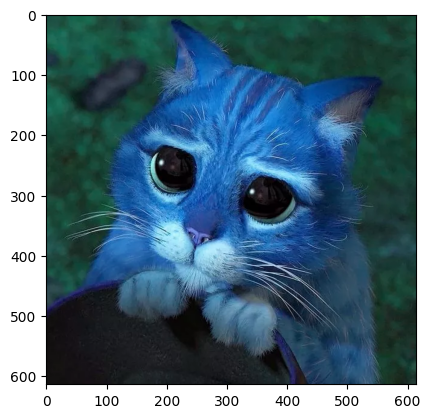

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

### Сохранение изображений

Чтобы сохранить изображение как файл на диске, можно вызвать функцию `imwrite` и передать в неё название файла и NumPy массив с самим изображением.

In [ ]:
cv2.imwrite('output.jpg', img)


### Преобразования изображений

С помощью OpenCV можно также выполнять преобразования над изображениями. Например, можно изменить разрешение картинки с 614x615 на 200x200:

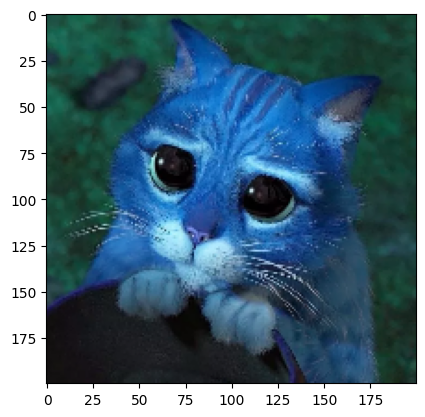

In [ ]:
resized_img = cv2.resize(img, (200, 200))
plt.imshow(resized_img)

Можно также повернуть картинку

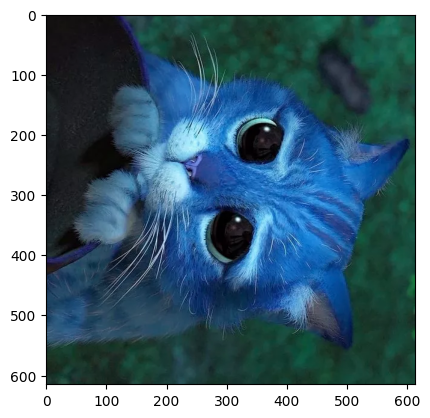

In [ ]:
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated_img)

или сделать срез картинки, чтобы обрезать лишнюю часть

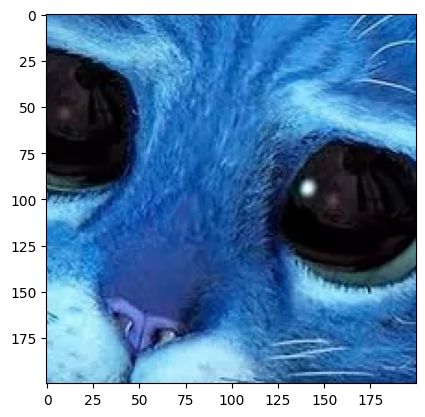

In [ ]:
cropped_img = img[200:400, 200:400]
plt.imshow(cropped_img)

### Цветовые пространства

Котик на картинке сейчас не очень похож на того самого котика: что-то не то с цветом. Это из-за того, что цвета расположены в BGR порядке, а не в RGB порядке. Давайте трансформируем цвета в RGB формат. Для этого мы можем использовать функцию `cvtColor` и передать в неё картинку и параметр `cv2.COLOR_BGR2RGB`:

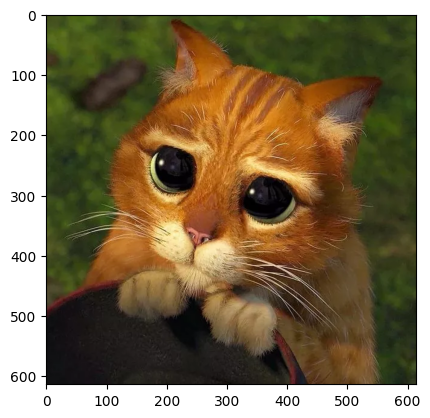

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

OpenCV также позволяет превратить цветную картинку в черно-белую. Для этого мы также можем использовать функцию `cvtColor`, передать картинку и параметр `cv2.COLOR_BGR2GRAY`:

Обратите внимание, что чтобы показать черно-белую картинку в Matplotlib необходимо передать параметр `cmap='gray'` в функцию `imshow`

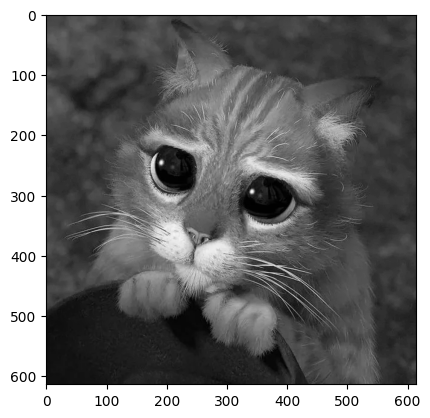

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

### Фильтрация изображений

OpenCV позволяет применять различные эффекты к картинке. Это достигается применением так называемого "фильтра" к картинке. Сейчас мы пока не будем вдаваться в подробности фильтрации, мы узнаем про это подробнее в следующих занятиях.

А пока мы можем использовать функцию `GaussianBlur` для того, чтобы применить так называемый эффект "блюра" или размытия:

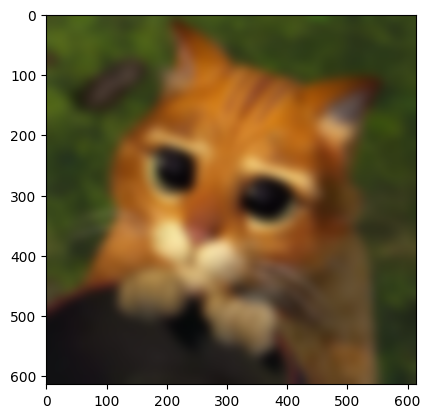

In [ ]:
kernel = (51, 51)
blurred_img = cv2.GaussianBlur(img, kernel, 0)
plt.imshow(blurred_img)

### Обработка видео

OpenCV позволяет получать изображения с веб-камеры. Для этого используется функция `VideoCapture`. Вот пример кода, в котором используется камера:

```python
cap = cv2.VideoCapture(0)  # Открываем захват видео с веб-камеры (0 - индекс устройства)
while True:  # Начинаем бесконечный цикл для непрерывного чтения кадров
    ret, frame = cap.read()  # Считываем кадр с веб-камеры; ret показывает успех/неудачу
    if not ret:  # Если кадр не был успешно считан
        break  # Прерываем цикл
    cv2.imshow('Video', frame)  # Отображаем текущий кадр в окне с названием 'Video'
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Ждем 1 миллисекунду и проверяем, нажата ли клавиша 'q'
        break  # Прерываем цикл, если нажата клавиша 'q'
cap.release()  # Освобождаем ресурс захвата видео
cv2.destroyAllWindows()  # Закрываем все открытые окна
```

К сожалению, этот код не сработает в Colab. Но если вам интересно, то вы можете создать Python файл на своем компьютере с этим кодом и запустить его :)

### Продвинутые возможности (Тизер)

В этом разделе мы лишь взглянем на некоторые возможности OpenCV, но пока вдаваться в подробности не будем :)

#### Обнаружение границ

Обнаружение границ – это метод в обработке изображений, который помогает находить края объектов на изображении. Это важно для понимания формы и структуры объектов на изображении. В OpenCV обнаружение границ часто выполняется с помощью оператора Кэнни (Canny Edge Detector):

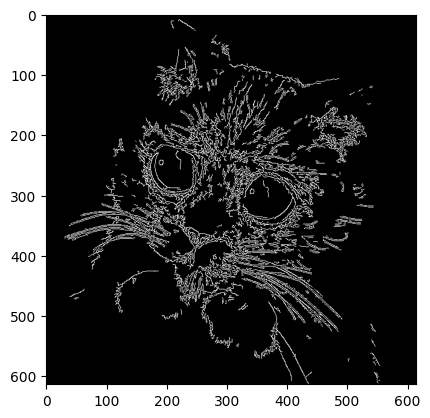

In [ ]:
t1 = 100 # Нижний порог
t2 = 200 # Верхний порог

edges = cv2.Canny(img, t1, t2)
plt.imshow(edges, cmap='gray')

#### Обнаружение контуров

Обнаружение контуров – это процесс выделения границ объектов на изображении, который помогает понять форму и структуру объектов. В OpenCV это делается с помощью функции `cv2.findContours`. Контуры могут быть использованы в самых разных задачах: от распознавания объектов до анализа формы.

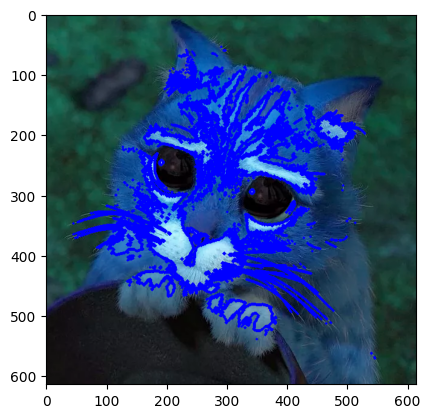

In [ ]:
_, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
plt.imshow(img_with_contours)

#### Распознавание лиц


Распознавание лиц с использованием Haar Cascades в OpenCV - это популярный метод, который используется для выявления лиц в изображениях

In [ ]:
!wget -O savvateev.jpg "https://upload.wikimedia.org/wikipedia/commons/4/43/Alexey_Savvateev_in_Losiny_Ostrov_National_Park_02.jpg"

--2024-07-13 16:44:04--  https://upload.wikimedia.org/wikipedia/commons/4/43/Alexey_Savvateev_in_Losiny_Ostrov_National_Park_02.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127071 (124K) [image/jpeg]
Saving to: ‘savvateev.jpg’

savvateev.jpg       100%[===================>] 124.09K  --.-KB/s    in 0.08s   

2024-07-13 16:44:05 (1.57 MB/s) - ‘savvateev.jpg’ saved [127071/127071]



In [ ]:
img2 = cv2.imread('savvateev.jpg')
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

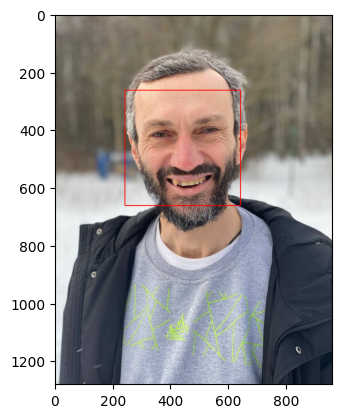

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_img2, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(img2)

## Упражнение 1.

В этом упраженении мы попрактикуемся пользоваться базовыми возможностями OpenCV: загрузим картинку, настроим цвета, и обрежем картинку.

*Заполните пропуски, обозначенные троеточием (...).*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Скачаем картинку:

In [ ]:
!wget -O gosling.jpg "https://www.grazia.ru/upload/attach/e6b/e6b512b4232be912a087f9166040e6ec.jpg"

--2024-07-15 11:45:29--  https://www.grazia.ru/upload/attach/e6b/e6b512b4232be912a087f9166040e6ec.jpg
Resolving www.grazia.ru (www.grazia.ru)... 95.181.182.182, 2a11:27c0:10::182
Connecting to www.grazia.ru (www.grazia.ru)|95.181.182.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402191 (393K) [image/jpeg]
Saving to: ‘gosling.jpg’

gosling.jpg         100%[===================>] 392.76K  2.09MB/s    in 0.2s    

2024-07-15 11:45:30 (2.09 MB/s) - ‘gosling.jpg’ saved [402191/402191]



Загрузим картинку и настроим цвета в RGB порядке

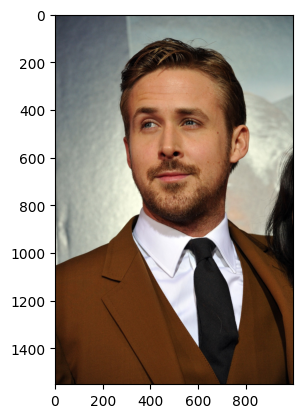

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Загружаем картинку с названием gosling.jpg
img = ...
# Преобразуем цвета с BGR в RGB
img = ...

plt.imshow(img)

Сделаем картинку черно-белой

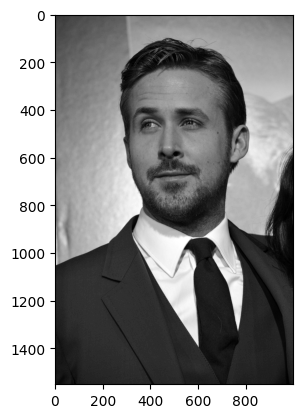

In [ ]:
# Преобразуем RGB цвета в черно-белые цвета
gray_img = ...

plt.imshow(gray_img, cmap='gray')

Обрежем картинку, чтобы оставить только лицо

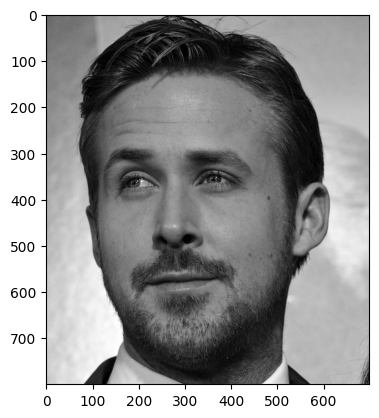

In [ ]:
# Обрежем черно-белую картинку по X координатам 100:900 и по Y координатам 200:900
cropped_gray_img = ...

plt.imshow(cropped_gray_img, cmap='gray')

## networkx

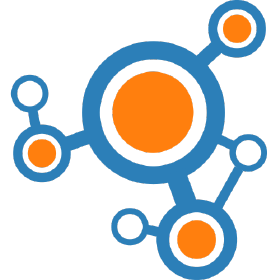

Источник: https://github.com/networkx

### Что такое networkx?

NetworkX — это библиотека на языке Python, предназначенная для создания, манипулирования и изучения сложных сетевых графов. Она предоставляет широкий спектр возможностей для работы с графами и сетями, включая создание, анализ и визуализацию.

Networkx можно применять в следующих задачах:
* Изучение влияния и распространения информации в социальных сетях.
* Моделирование и анализ биологических сетей, таких как генные сети, сети взаимодействий белков и метаболические пути.
* Анализ сетей интернет-сайтов, гиперссылок и маршрутизации данных.
* Оптимизация маршрутов и анализ транспортных систем.
* Моделирование и анализ электрических сетей и сетей распределения энергии.
* Анализ сетей цитирования и сотрудничества между учеными.

### Установка и импортирование

Для установки NetworkX используйте пакетный менеджер pip. Выполните следующую команду в командной строке или терминале:

In [ ]:
!pip install networkx

После установки библиотеки NetworkX, вы можете импортировать её в ваш Python-скрипт или интерактивную сессию

In [ ]:
import networkx as nx

### Что такое граф?

![graph](https://imcs.dvfu.ru/cats/static/download/img/img_ZyzHGQi1RFSZOU4qIGMrTuWhv5YaRWuK_topsort.svg)

Граф — это математическая структура, состоящая из множества узлов (вершин) и множества ребер (связей), которые соединяют пары узлов. Граф $ G $ определяется как пара множеств $ G = (V, E) $, где:
- $ V $ — множество узлов (вершин),
- $ E $ — множество ребер, каждое из которых является подмножеством $ V \times V $.

**Узлы (или Вершины)**

Основные элементы графа, которые могут представлять объекты, сущности или точки соединения. Обозначаются, как правило, символами, например $V = \{v_1, v_2, \dots, v_n\}$.

**Ребра (Связи)**

Соединения между парами узлов, представляющие отношения или взаимодействия между этими узлами. Ребра обычно изображаются линиями или стрелками. Обозначаются, как правило, парами узлов, например $ E = \{e_1, e_2, \dots, e_m\} $, где каждое ребро $ e_i $ связывает два узла.

Типы графов:
* **Неориентированный граф**

    Ребра не имеют направления

* **Ориентированный граф (Диграф)**

    Ребра имеют направление

* **Мультиграф**:

    Граф, в котором могут существовать несколько ребер между одной и той же парой узлов

* **Взвешенный граф**:

    Граф, в котором могут существовать несколько ребер между одной и той же парой узлов

### Создание графов

Для создания графа используется конструктор класса `Graph`. В NetworkX можно создавать различные типы графов, такие как неориентированные, ориентированные, мультиграфы и взвешенные графы. Создадим неориентированный граф:

In [ ]:
import networkx as nx

# Создание пустого графа
G = nx.Graph()

# Добавление узлов
G.add_node(1)
G.add_nodes_from([2, 3, 4, 5])

# Добавление ребер
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4), (4, 5), (5, 1)])

# Вывод информации о графе
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))


Nodes: [(1, {}), (2, {}), (3, {}), (4, {}), (5, {})]
Edges: [(1, 2, {}), (1, 5, {}), (2, 3, {}), (3, 4, {}), (4, 5, {})]


### Визуализация графов

Построить визуализацию графа можно с помощью `draw`

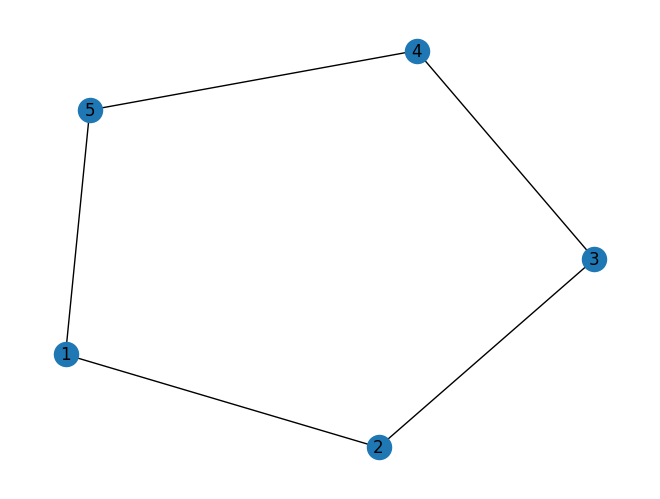

In [ ]:
# Визуализация графа
pos = nx.spring_layout(G) # Определяем расположение узлов
nx.draw(G, pos, with_labels=True)
plt.show()

### Получение информации о графе (количество узлов, рёбер, степень узлов)

`number_of_nodes` и `number_of_edges` показывают число вершин и число ребер соответственно

In [ ]:
print(f"Количество узлов: {G.number_of_nodes()}")
print(f"Количество ребер: {G.number_of_edges()}")

Количество узлов: 5
Количество ребер: 5


Можно также посмотреть степени конкретных узлов

Степень вершины в графе — это количество ребер, которые соединяются с этой вершиной. Иными словами, это количество соседей (или соединений) у данной вершины.

In [ ]:
print(f"Степень вершины 1: {G.degree[1]}")

Степень вершины 1: 2


### Алгоритмы поиска

Довольно часто при работе с графами необходимо выполнять обход графа. Например, для того, чтобы найти путь.

Для обхода есть два популярных подхода: поиск в глубину и поиск в ширину.



Для понимания этих подходов, необходимо понять что такое дерево в теории графов.

**Дерево** — это связный граф без циклов. Это означает, что в дереве есть путь между любой парой узлов, и граф не содержит циклов (то есть, путей, которые начинаются и заканчиваются в одной и той же вершине).

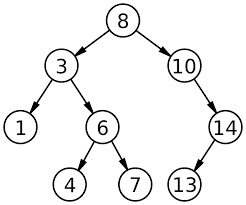

Источник: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrxw-HyHVIvSvCOQUVf2o97GWHtIXbBu6b4Q&s

**Дерево поиска в ширину (BFS Tree)**

Показывает, как узлы графа могут быть достигнуты, начиная с начального узла, обходя сначала все узлы на текущем уровне, а затем переходя к следующему уровню.

**Дерево поиска в глубину (DFS Tree)**

Показывает, как узлы графа могут быть достигнуты, начиная с начального узла, погружаясь глубже в граф, прежде чем возвращаться и исследовать другие пути.

[Здесь](https://habr.com/ru/companies/timeweb/articles/751762/) вы можете почитать более подробно об алгоритмах поиска в графе.

Функции `bfs_tree` и `dfs_tree` можно использовать, чтобы построить дерево поиска в ширину и дерево поиска в глубину соответственно

In [ ]:
bfs_tree = nx.bfs_tree(G, source=1)
dfs_tree = nx.dfs_tree(G, source=1)

Визуализируем эти деревья

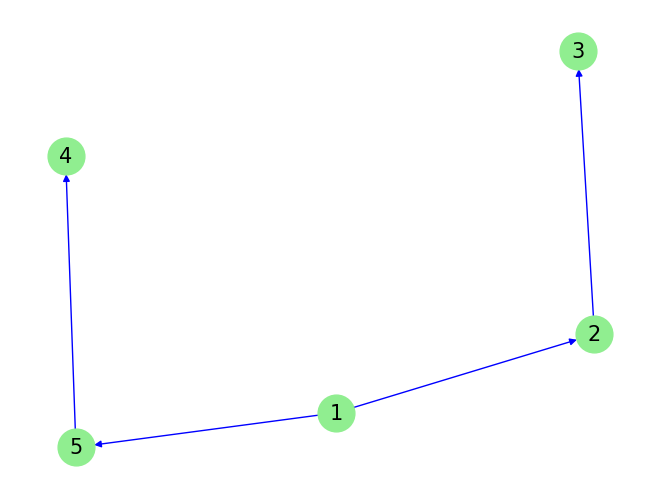

In [ ]:
# Визуализация дерева поиска BFS
nx.draw(bfs_tree, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=700, font_size=15, font_color='black')

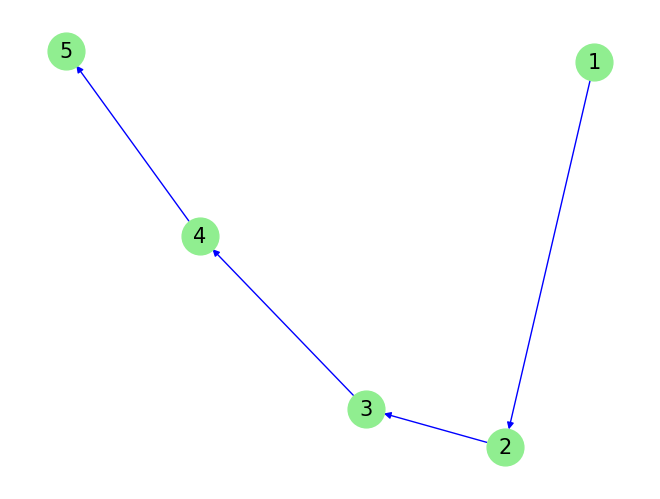

In [ ]:
# Визуализация дерева поиска DFS
nx.draw(dfs_tree, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=700, font_size=15, font_color='black')

### Кратчайший путь

Рассмотрим конкретную функцию, которая помогает искать кратчайший путь в графе. Это можно сделать с помощью `shortest_path` функции.

Методы, которые реализованы в `shortest_path`:
* Dijkstra
* Bellman-Ford
* A (A-star)

In [ ]:
shortest_path = nx.shortest_path(G, source=1, target=3, method='dijkstra')
print(shortest_path)

[1, 2, 3]


## Упражнение 2.

*Заполните пропуски, обозначенные троеточием (...).*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Создадим граф, в котором будет 5 вершин и иметь следующие ребра:
* (1, 2)
* (1, 3)
* (2, 4)
* (3, 4)
* (4, 5)

In [ ]:
a = [1,2,3]
b = ['a', 'b', 'c']

for i in range(len(a)):
    print(a[i], b[i])

1 a
2 b
3 c


In [ ]:
for pair in zip(a,b):
    print(pair)

(1, 'a')
(2, 'b')
(3, 'c')


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание графа
G = nx.Graph()

# Добавляем узлы (вершины)
...

# Добавляем ребра
...

Посмотрим на получившийся граф

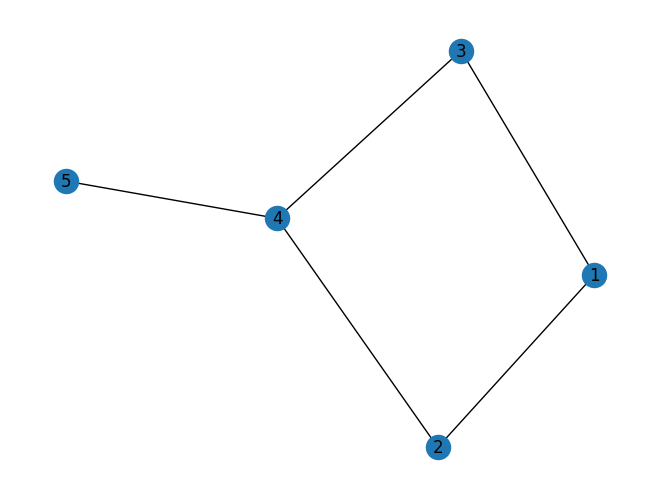

In [ ]:
# Визуализация графа
pos = nx.spring_layout(G) # Определяем расположение узлов
nx.draw(G, pos, with_labels=True)
plt.show()

Теперь попробуем найти путь от вершины 1 до вершины 5

In [ ]:
# Поиск пути (от вершины 1 до вершины 5)
shortest_path = ...

print(f"Кратчайший путь от узла 1 до узла 5: {shortest_path}")

Кратчайший путь от узла 1 до узла 5: [1, 2, 4, 5]


Визуализируем найденный путь

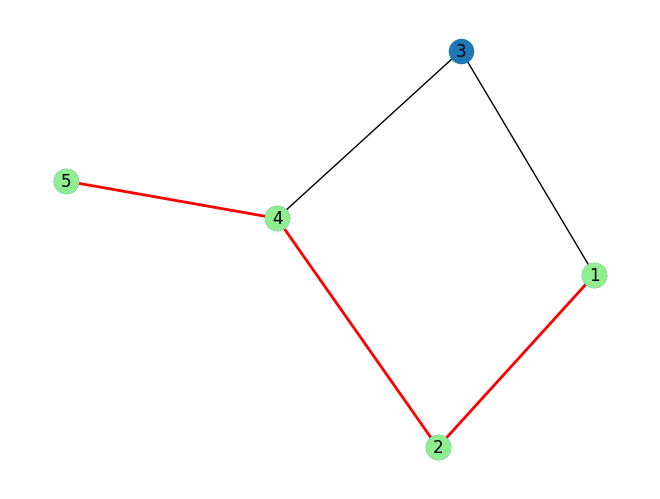

In [ ]:
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen')  # Выделение узлов пути
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='red', width=2)  # Выделение ребер пути
plt.show()

## Заключение

На этом занятии мы познакомились с библиотекой OpenCV для работы с изображениями и библиотекой Networkx для работы с графами.

OpenCV предлагает более 2500 оптимизированных алгоритмов для задач распознавания объектов, обнаружения лиц, обработки изображений, видеоанализа, 3D реконструкции и машинного обучения.

NetworkX — это библиотека Python для создания, манипулирования и анализа сложных сетевых графов, применяемая для изучения социальных, биологических, интернет-сетей, транспортных систем, электрических сетей и научных цитирований.